<a href="https://colab.research.google.com/github/PeronxD/Python/blob/main/an%C3%A1lises_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A ideia deste trabalho e estudar algumas características dos GMs pelo mundo e identificar padrões através de uma análise mais descritiva.

### Foram utilizadas as informações de jogadores com a titulação de Grande Mestre de Xadrez, que é o título mais alto do xadrez.

## Importando os dados a serem analisados [GM Chess Games](https://www.kaggle.com/datasets/lazaro97/gm-chess-games?resource=download)

In [273]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [274]:
import pandas as pd
import numpy as np

In [275]:
dados_biog = pd.read_csv('players_biography.csv')

In [276]:
dados = dados_biog
dados.drop(columns = ['FIDE ID'],inplace=True)

In [277]:
dados.head(5)

,Name,Born,Results,White Results,Black Results,Active,Current Rating,Max Rating,Country
0,"Salem, A. R. Saleh",1993,Win: 46.9% (519) Loss: 26.6% (294) Draw: 26.6%...,Win: 50.7% (284) Loss: 23.4% (131) Draw: 25.9%...,Win: 43% (235) Loss: 29.8% (163) Draw: 27.2% (...,2002-08-22 to 2019-12-30,2682 on 2021-04-01,2682 on 2020-01-01,UAE
1,"Schwarz, Adolf",1836-10-31,Win: 28.6% (38) Loss: 42.1% (56) Draw: 29.3% (...,Win: 28.4% (19) Loss: 35.8% (24) Draw: 35.8% (...,Win: 28.8% (19) Loss: 48.5% (32) Draw: 22.7% (...,1873 to 1900,2657*,2657*,HUN/AUT
2,"Rakhmanov, Aleksandr",1989,Win: 40.6% (617) Loss: 17.9% (271) Draw: 41.5%...,Win: 46% (354) Loss: 14% (108) Draw: 40% (308)...,Win: 35.2% (263) Loss: 21.8% (163) Draw: 43% (...,2001-10-01 to 2020-12-17,2651 on 2021-04-01,2676 on 2017-05-01,RUS
3,"Alekhine, Alexander",1892-10-31,Win: 56.8% (725) Loss: 11.9% (152) Draw: 31.3%...,Win: 60.3% (417) Loss: 11.1% (77) Draw: 28.6% ...,Win: 52.6% (308) Loss: 12.8% (75) Draw: 34.5% ...,1906 to 1946,2700*,2700*,URS
4,"Areshchenko, Alexander",1986,Win: 43.6% (568) Loss: 14.7% (191) Draw: 41.7%...,Win: 52.7% (351) Loss: 11.6% (77) Draw: 35.7% ...,Win: 34.1% (217) Loss: 17.9% (114) Draw: 48% (...,1996 to 2019-12-08,2687 on 2021-04-01,2720 on 2012-12-01,UKR


## Verificar a consistência dos dados




In [278]:
dados.isna().sum() # temos alguns valores faltantes

Name              0
Born              0
Results           0
White Results     0
Black Results     0
Active            0
Current Rating    0
Max Rating        0
Country           0
dtype: int64

In [279]:
dados.info() # olhando para a tipagem das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    object
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    object
 7   Max Rating      128 non-null    object
 8   Country         128 non-null    object
dtypes: object(9)
memory usage: 9.1+ KB


## Tratamento do dataframe


In [280]:
# a ideia aqui é splitar essas variáveis para podermos pegar apenas a parte numérica útil
dados['Current Rating'] = dados['Current Rating'].str.strip().str.split(' ').str[0]
dados['Max Rating'] = dados['Max Rating'].str.strip().str.split(' ').str[0]
dados['Born'] = dados['Born'].str.strip().str.split('-').str[0]


In [281]:
import re

dados['Current Rating'] = dados['Current Rating'].str.replace(r'\D', '', regex=True)
dados['Born'] = dados['Born'].str.replace(r'\D', '', regex=True)
dados['Max Rating'] = dados['Max Rating'].str.replace(r'\D', '', regex=True)

# Converter para inteiros
dados['Current Rating'] = dados['Current Rating'].astype(int)
dados['Born'] = dados['Born'].astype(int)
dados['Max Rating'] = dados['Max Rating'].astype(int)


In [282]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            128 non-null    object
 1   Born            128 non-null    int64 
 2   Results         128 non-null    object
 3   White Results   128 non-null    object
 4   Black Results   128 non-null    object
 5   Active          128 non-null    object
 6   Current Rating  128 non-null    int64 
 7   Max Rating      128 non-null    int64 
 8   Country         128 non-null    object
dtypes: int64(3), object(6)
memory usage: 9.1+ KB


In [283]:
dados['Idade'] = 2021 - dados.Born # add coluna de idade dos jogadores

In [284]:
dados = dados.sort_values(by='Current Rating', ascending=False).reset_index(drop=True) # Ordenando em relação ao rating

## Análise exploratória


In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [286]:
dados.describe()

,Born,Current Rating,Max Rating,Idade
count,128.000000,128.000000,128.000000,128.000000
mean,1964.960938,2697.023438,2726.664062,56.039062
std,48.564010,42.273848,51.163668,48.564010
min,1806.000000,2650.000000,2650.000000,18.000000
25%,1973.000000,2663.750000,2685.250000,28.750000
50%,1986.000000,2683.000000,2719.000000,35.000000
75%,1992.250000,2715.250000,2761.000000,48.000000
max,2003.000000,2847.000000,2882.000000,215.000000


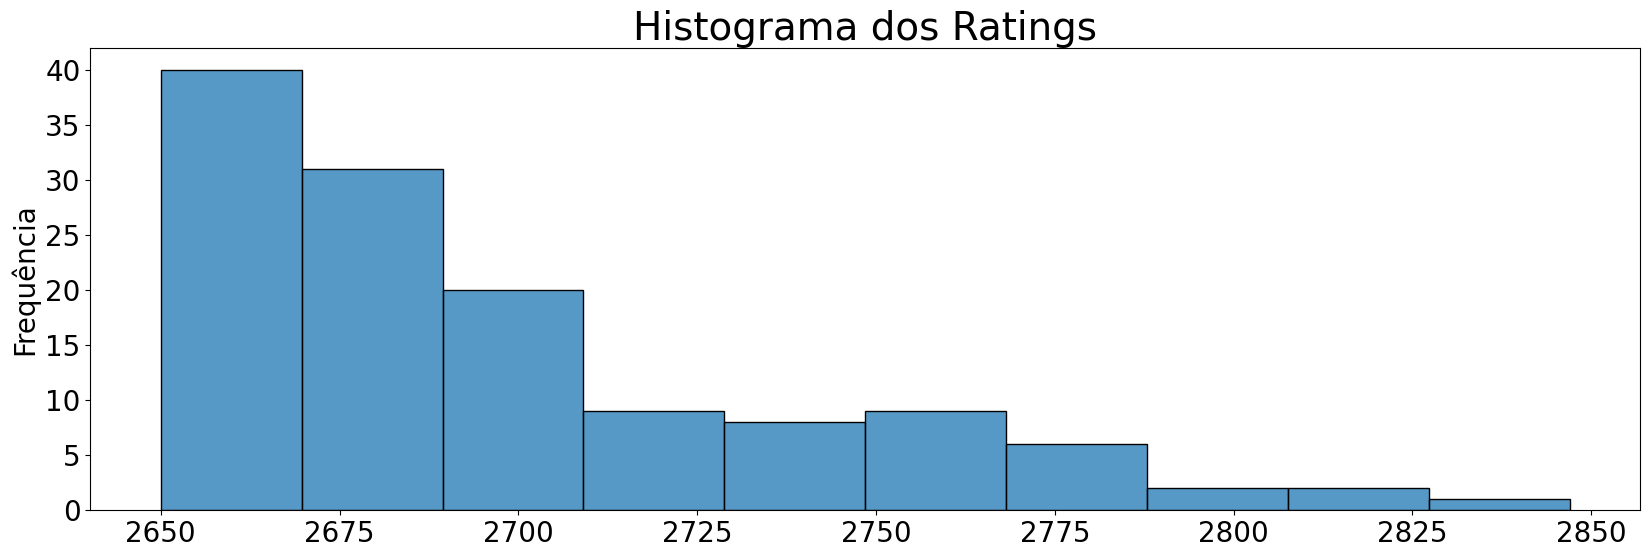

In [287]:
# Histograma dos ratings
sns.histplot(dados['Current Rating'])
plt.title('Histograma dos Ratings', fontsize=28)
plt.ylabel('Frequência',fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


Pelo histograma nota-se que conforme o rating sobe a frequência diminui muito. Maior parte ods GMs estão numa faixa abaixo dos 2700

In [288]:
dados['Current Rating'].describe()

count     128.000000
mean     2697.023438
std        42.273848
min      2650.000000
25%      2663.750000
50%      2683.000000
75%      2715.250000
max      2847.000000
Name: Current Rating, dtype: float64

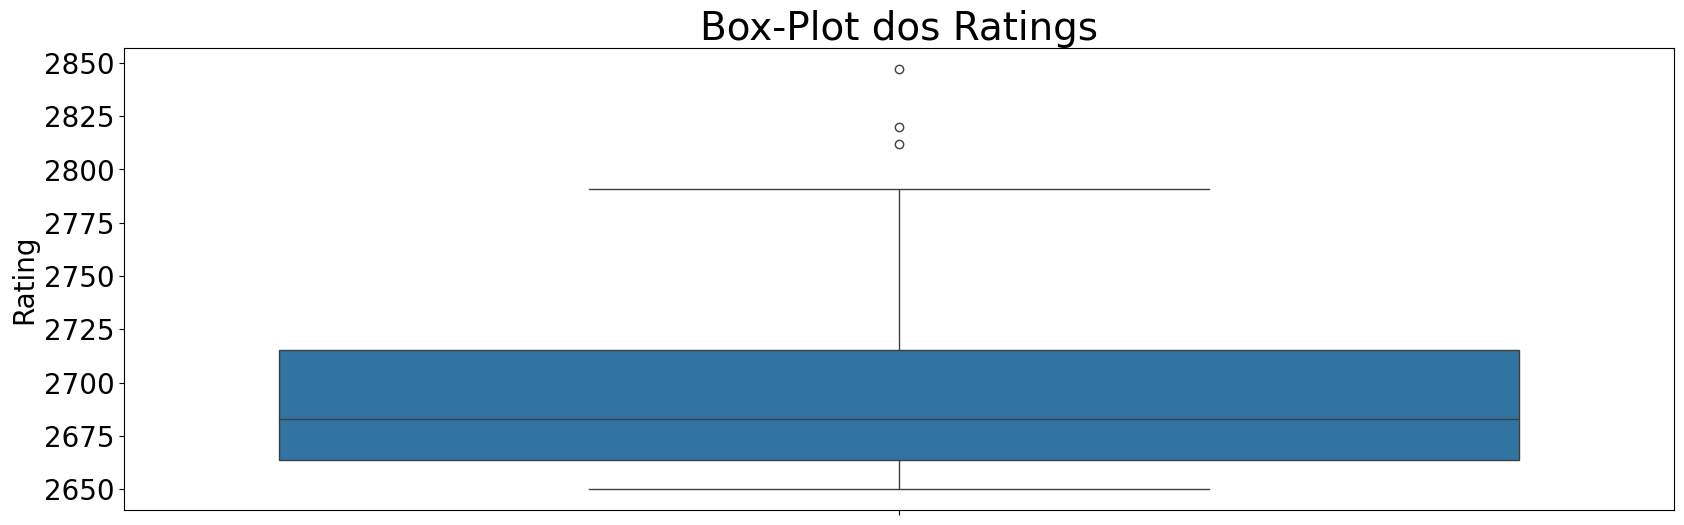

In [289]:
#boxplot dos ratings
sns.boxplot(dados['Current Rating'])
plt.title('Box-Plot dos Ratings', fontsize=28)
plt.ylabel('Rating',fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

O box-plot nos mostra uma certa assimetria nos dados, temos que 50% dos GM´s tem até 2683 de rating FIDE, 25% tem entre 2663.75 e 2683 onde o mínimo é de 2650, já os 25% com maior rating tem mais de 2715.25 com 3 pontos descrepantes e máximo de 2847.
Isso mostra que aqueles com maior rating estão bem acima dos demais, o que faz a média de 2697.023438 não refletir tão bem a realidade, pois 50% dos jogadores tem menos de 2683.

In [290]:
dados['Country'].unique()

array(['NOR', 'USA', 'RUS', 'CHN', 'ARM', 'NED', 'AZE', 'HUN', 'FID',
       'FRA', 'IND', 'BUL', 'CUB', 'POL', 'GER', 'ENG', 'SCO/USA', 'ESP',
       'VIE', 'URS', 'UKR', 'EGY', 'CZE', 'AUT', 'UAE', 'ISR', 'IRI',
       'SWE', 'AUT/USA', 'UZB', 'HUN/AUT', 'GER/USA', 'ROU',
       'POL/RUS/FRA', 'HUN/AUS', 'PER', 'BRD'], dtype=object)

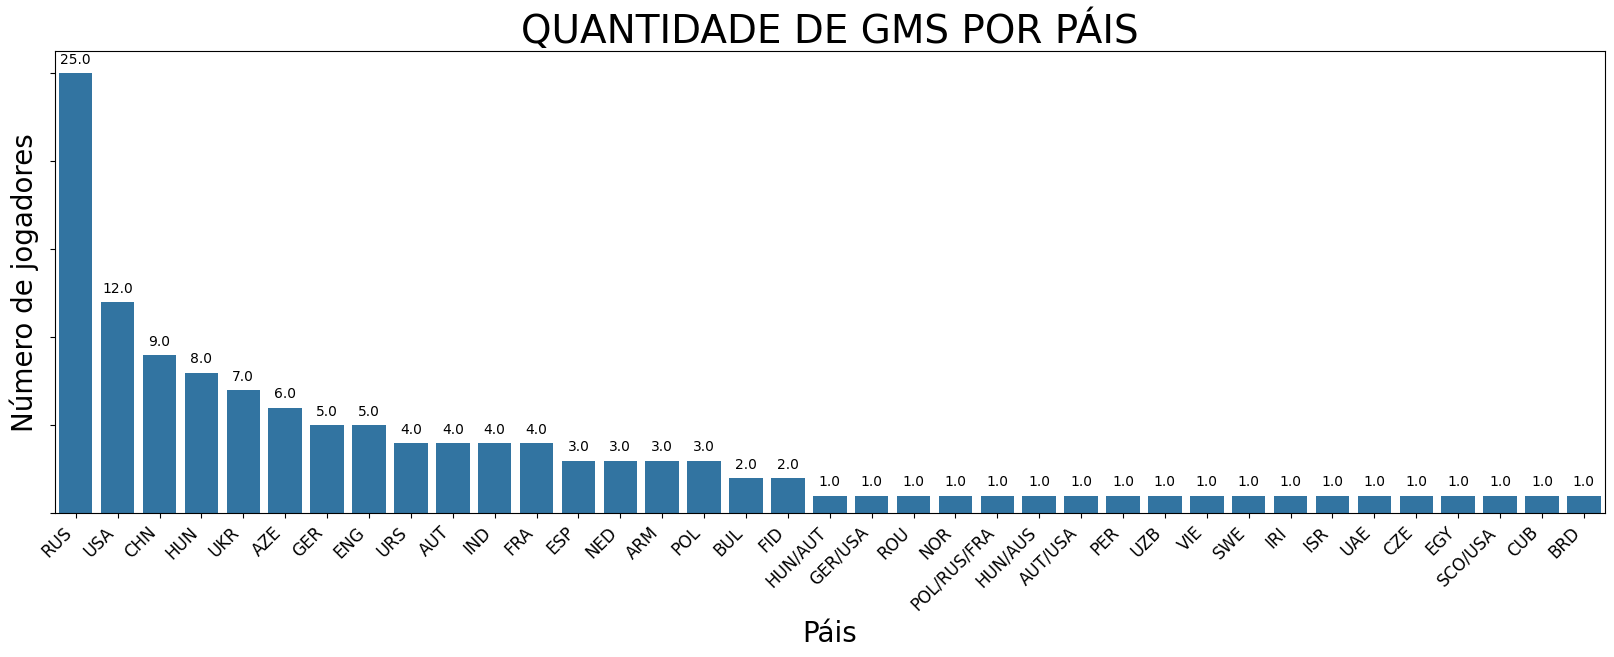

In [291]:
# quantidade de jogadores de cada país
ax = sns.countplot(data=dados, x='Country', order=dados['Country'].value_counts().index)

plt.xlabel('Páis', fontsize=20)
plt.ylabel('Número de jogadores', fontsize=20)
plt.title('QUANTIDADE DE GMS POR PÁIS', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Através deste gráfico vemos um grande número de Russos sendo 25 deles, seguido por 12 Americanos e 9 Chineses, além disso há uma grande variedade de países representados entre os top GMs com 33 países diferentes

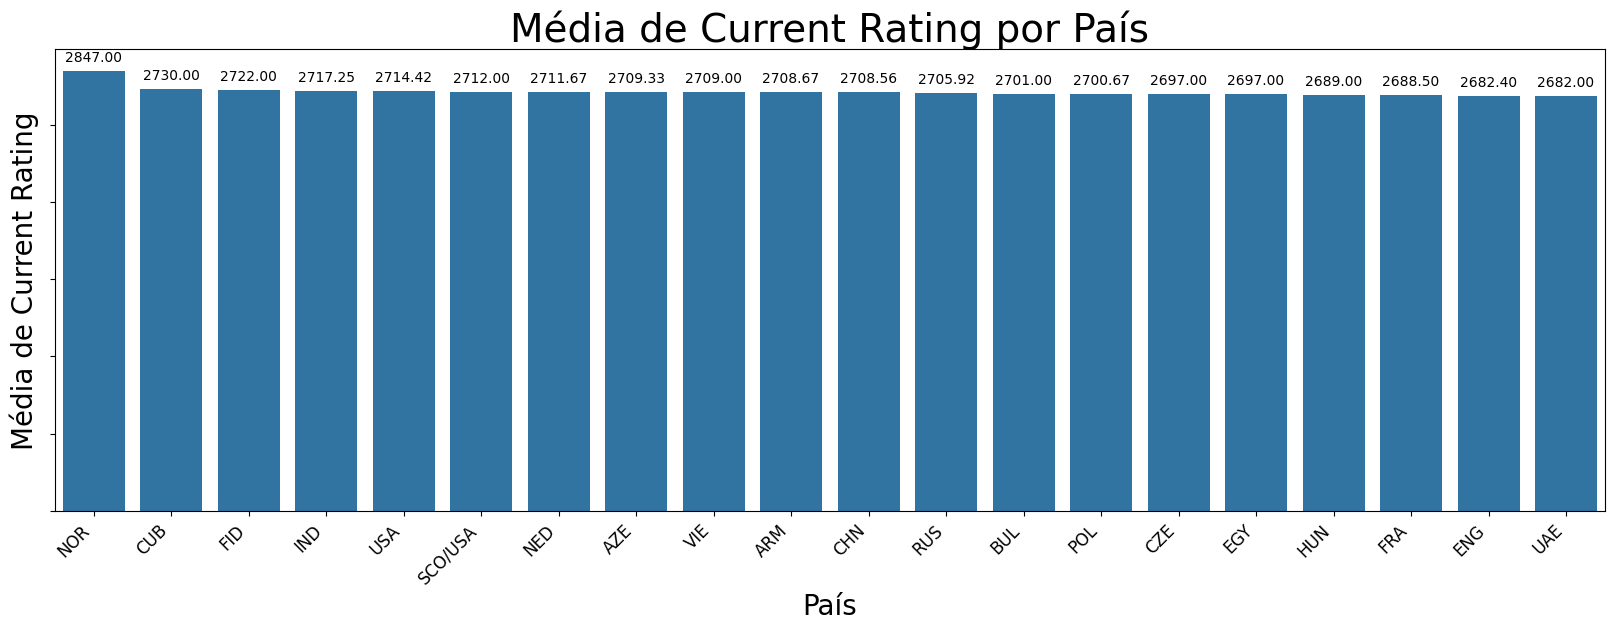

In [292]:
# média do rating de cada país
media_por_pais = dados.groupby('Country')['Current Rating'].mean().reset_index()
top10_medias = media_por_pais.sort_values(by='Current Rating', ascending=False).head(20)

ax = sns.barplot(data=top10_medias, x='Country', y='Current Rating')

plt.xlabel('País',fontsize = 20)
plt.ylabel('Média de Current Rating',fontsize = 20)
plt.title('Média de Current Rating por País',fontsize = 28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Olhando para a média de rating por país vemos que os 3 primeiros são aqueles com menor número de jogadres, sendo a NOR e CUB com apenas 1 representante e FID com 2, a seguir vemos os Indianos com 4 representantes e um rating médio de 2717.25 e os Americanos com 2714.42.

O restante está bem próximo de rating, nota-se que os Russos aparecem em 12 lugar, com 2705.92 e os Chineses em 11 lugar com 2708.56, ou seja, estes países possuem muitos GMs porém na média eles não são os mais fortes

In [ ]:
# média do rating por faixa de idade
faixas_etarias = [0, 20, 30, 40, 50, 60, 80]
dados['faixa_etaria'] = pd.cut(dados['Idade'], bins=faixas_etarias, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-80'])

# média de 'Current Rating' para cada faixa_etaria
media_por_faixa = dados.groupby('faixa_etaria')['Current Rating'].mean()

# ordena as faixas etárias pela média de 'Current Rating'
media_por_faixa = media_por_faixa.sort_values(ascending=False)

ax = sns.barplot(x=media_por_faixa.index, y=media_por_faixa.values, order=media_por_faixa.index)

plt.xlabel('faixa_etaria',fontsize=20)
plt.ylabel('Média de Current Rating',fontsize=20)
plt.title('Média de Current Rating por Faixa Etária',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
dados['faixa_etaria'].value_counts()

Com relação a idade destes enxadistas nota-se algo muito legal, a maior média de rating está na faixa de 61-80 anos, seguido pelos mais jovens de 0-20 anos, entretanto se olharmos para a quantidade de GMs com essa idade tem-se apenas 1 jogadores na faixa de 61-80 e 2 de 0-20, ou seja, essa média não reflete a realidade bem.

Tirando estas faixas temos que 5 jogadores com 51-60 e um rating médio de 2720.80, seguindo por 17 jogadores com 41-50 anos e um rating médio de 2705.36.

Por fim temos as faixas com maior número de enxadristas, de 21-30 com uma média de 2697.58 de rating e  por último aqueles com 31-40 com 44 enxadristas e um raiting médio de 2682.24

## A partir daqui a minha ideia é validar algumas perguntas como por exemplo

##  Jogadores mais jovens (até 30 anos) tendem a arriscar mais enquanto os jogadores mais antigos(mais que 40 anos) são mais conservadores.
## Existe diferença atualmente entre o estilo de jogo dos Russos e dos Americanos


## Jogadores mais jovens (até 30 anos) tendem a arriscar mais enquanto os jogadores mais antigos(mais que 40 anos) são mais conservadores.

In [ ]:
dados.head(5)

In [ ]:
# criando uma lista de strings com o split de Results
dados['Results'] = dados['Results'].str.split()
dados['White Results'] = dados['White Results'].str.split()
dados['Black Results'] = dados['Black Results'].str.split()


# Criando colunas específicas para Results
dados['taxa_vitoria'] = dados['Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias'] = dados['Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota'] = dados['Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas'] = dados['Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate'] = dados['Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates'] = dados['Results'].apply(lambda x: x[8] if len(x) > 0 else None)




# Criando colunas específicas para White Results
dados['taxa_vitoria_brancas'] = dados['White Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_brancas'] = dados['White Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_brancas'] = dados['White Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_brancas'] = dados['White Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_brancas'] = dados['White Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_brancas'] = dados['White Results'].apply(lambda x: x[8] if len(x) > 0 else None)


# Criando colunas específicas para Black Results
dados['taxa_vitoria_pretas'] = dados['Black Results'].apply(lambda x: x[1] if len(x) > 0 else None)
dados['numero_vitorias_pretas'] = dados['Black Results'].apply(lambda x: x[2] if len(x) > 0 else None)

dados['taxa_derrota_pretas'] = dados['Black Results'].apply(lambda x: x[4] if len(x) > 0 else None)
dados['numero_derrotas_pretas'] = dados['Black Results'].apply(lambda x: x[5] if len(x) > 0 else None)

dados['taxa_empate_pretas'] = dados['Black Results'].apply(lambda x: x[7] if len(x) > 0 else None)
dados['numero_empates_pretas'] = dados['Black Results'].apply(lambda x: x[8] if len(x) > 0 else None)





In [ ]:
# Definindo uma lista de colunas a serem processadas
colunas_a_processar = ['taxa_vitoria', 'numero_vitorias', 'taxa_derrota', 'numero_derrotas', 'taxa_empate', 'numero_empates',
                       'taxa_vitoria_brancas', 'numero_vitorias_brancas', 'taxa_derrota_brancas', 'numero_derrotas_brancas',
                       'taxa_empate_brancas', 'numero_empates_brancas', 'taxa_vitoria_pretas', 'numero_vitorias_pretas',
                       'taxa_derrota_pretas', 'numero_derrotas_pretas', 'taxa_empate_pretas', 'numero_empates_pretas']


for coluna in colunas_a_processar:
    dados[coluna] = dados[coluna].str.replace('[()%]', '', regex=True)

# Convertendo as colunas para os tipos desejados
colunas_numericas = ['numero_vitorias', 'numero_derrotas', 'numero_empates', 'numero_vitorias_brancas', 'numero_derrotas_brancas', 'numero_empates_brancas',
                     'numero_vitorias_pretas', 'numero_derrotas_pretas', 'numero_empates_pretas']

dados[colunas_numericas] = dados[colunas_numericas].astype('int', errors='ignore')

colunas_porcentagem = ['taxa_vitoria', 'taxa_derrota', 'taxa_empate', 'taxa_vitoria_brancas', 'taxa_derrota_brancas', 'taxa_empate_brancas',
                       'taxa_vitoria_pretas', 'taxa_derrota_pretas', 'taxa_empate_pretas']

dados[colunas_porcentagem] = dados[colunas_porcentagem].astype('float', errors='ignore') / 100.0


In [ ]:
dados.drop(columns=['Results','White Results','Black Results'],inplace=True)

### Separando entre jovens (até 30 anos) e antigos (mais que 40 anos)

In [ ]:
for i in range(len(dados.index)):
    if (dados.loc[i, 'faixa_etaria'] == '0-20') or (dados.loc[i, 'faixa_etaria'] == '21-30'):
        dados.loc[i, 'classificacao'] = 'Jovem'
    elif (dados.loc[i, 'faixa_etaria'] == '41-50') or (dados.loc[i, 'faixa_etaria'] == '51-60'):
        dados.loc[i, 'classificacao'] = 'Antigo'



In [ ]:
jovens = dados[dados['classificacao'] == 'Jovem']

antigos = dados[dados['classificacao'] == 'Antigo']

In [ ]:
jovens.shape[0],antigos.shape[0]

In [ ]:
jovens['Current Rating'].describe(), antigos['Current Rating'].describe()

In [ ]:
# Médias
medias_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].mean()
medias_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].mean()

medias_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].mean()
medias_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].mean()

medias_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].mean()
medias_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].mean()

# Desvios padrão
desvios_vitoria_brancas = dados.groupby('classificacao')['taxa_vitoria_brancas'].std()
desvios_vitoria_pretas = dados.groupby('classificacao')['taxa_vitoria_pretas'].std()

desvios_derrota_brancas = dados.groupby('classificacao')['taxa_derrota_brancas'].std()
desvios_derrota_pretas = dados.groupby('classificacao')['taxa_derrota_pretas'].std()

desvios_empate_brancas = dados.groupby('classificacao')['taxa_empate_brancas'].std()
desvios_empate_pretas = dados.groupby('classificacao')['taxa_empate_pretas'].std()

# Coeficientes de variação
coef_var_vitoria_brancas = (desvios_vitoria_brancas / medias_vitoria_brancas) * 100
coef_var_vitoria_pretas = (desvios_vitoria_pretas / medias_vitoria_pretas) * 100

coef_var_derrota_brancas = (desvios_derrota_brancas / medias_derrota_brancas) * 100
coef_var_derrota_pretas = (desvios_derrota_pretas / medias_derrota_pretas) * 100

coef_var_empate_brancas = (desvios_empate_brancas / medias_empate_brancas) * 100
coef_var_empate_pretas = (desvios_empate_pretas / medias_empate_pretas) * 100

# Criar DataFrame
df_comparacao = pd.DataFrame({
    'media_vitoria_brancas': medias_vitoria_brancas,
    'desvio_padrao_vitoria_brancas': desvios_vitoria_brancas,
    'coef_var_vitoria_brancas': coef_var_vitoria_brancas,

    'media_vitoria_pretas': medias_vitoria_pretas,
    'desvio_padrao_vitoria_pretas': desvios_vitoria_pretas,
    'coef_var_vitoria_pretas': coef_var_vitoria_pretas,

    'media_derrota_brancas': medias_derrota_brancas,
    'desvio_padrao_derrota_brancas': desvios_derrota_brancas,
    'coef_var_derrota_brancas': coef_var_derrota_brancas,

    'media_derrota_pretas': medias_derrota_pretas,
    'desvio_padrao_derrota_pretas': desvios_derrota_pretas,
    'coef_var_derrota_pretas': coef_var_derrota_pretas,

    'media_empate_brancas': medias_empate_brancas,
    'desvio_padrao_empate_brancas': desvios_empate_brancas,
    'coef_var_empate_brancas': coef_var_empate_brancas,

    'media_empate_pretas': medias_empate_pretas,
    'desvio_padrao_empate_pretas': desvios_empate_pretas,
    'coef_var_empate_pretas': coef_var_empate_pretas,
}, index=['Antigo', 'Jovem'])

# Exibir o DataFrame resultante
df_comparacao


Verificando se existe diferença significativa entre essas médias das taxas, como possuimos uma amostra pequena então iremos utilizar o teste não paramétrico Mann-Whitney. Importante ressaltar que obtivemos CV moderados altos, entre 10 e 30 % ou seja, talvez o teste não reflita a realidade tão bem


In [ ]:
import scipy.stats as stats

statistic_1, p_value_1 =stats.mannwhitneyu(jovens['taxa_vitoria_pretas'], antigos['taxa_vitoria_pretas'])
statistic_2, p_value_2 = stats.mannwhitneyu(jovens['taxa_derrota_pretas'], antigos['taxa_derrota_pretas'])
statistic_3, p_value_3 = stats.mannwhitneyu(jovens['taxa_empate_pretas'], antigos['taxa_empate_pretas'])

statistic_4, p_value_4 = stats.mannwhitneyu(jovens['taxa_vitoria_brancas'], antigos['taxa_vitoria_brancas'])
statistic_5, p_value_5 = stats.mannwhitneyu(jovens['taxa_derrota_brancas'], antigos['taxa_derrota_brancas'])
statistic_6, p_value_6 = stats.mannwhitneyu(jovens['taxa_empate_brancas'], antigos['taxa_empate_brancas'])


In [ ]:
testes = {'taxa_vitoria_pretas' : p_value_1 ,
          'taxa_derrota_pretas' : p_value_2,
          'taxa_empate_pretas' : p_value_3,
          'taxa_vitoria_brancas' : p_value_4 ,
          'taxa_derrota_brancas' : p_value_5,
          'taxa_empate_brancas' : p_value_6
          }

df_testes = pd.DataFrame(data = testes,index = ['p_valores'])
df_testes

Nota-se que os mais jovens tendem a vencer, e perderem mais também, tanto de bracncas quanto de pretas. Os mais antigos empatam mais tanto de brancas quanto de pretas, ou seja, os enxadristas mais novos arriscam mais nas partidas, por isso ganham mais porém também perdem mais

## Avaliando o estilo de jogo dos Russos e Americanos, para essa análise usaremos apenas jogadores atuais, ou seja, jogadores com menos de 40 anos

In [ ]:
# Pegaremos os 8 jogadores com mais rating de cada país para a comparação
russos = dados[(dados['Country'] == 'RUS') & (dados['Idade'] <= 40)].head(8).reset_index(drop=True)
americanos = dados[(dados['Country'] == 'USA') & (dados['Idade'] <= 40)].head(8).reset_index(drop=True)

In [ ]:
print('a média de rating dos russos é',russos['Current Rating'].mean()) , print('a média de rating dos americanos é',americanos['Current Rating'].mean())

In [ ]:
russos['Current Rating'].describe() , americanos['Current Rating'].describe()

In [ ]:
pd.concat([americanos[['Name', 'Current Rating']], russos[['Name', 'Current Rating']]], axis = 1)

In [ ]:
americanos.Name

Nota-se que a média de rating dos Russos é superior à dos Americanos, além disso o rating dos Russos está mais concentrado em torno dessa média, sendo todos acima de 2700, entretanto existem alguns Americanos com rating maior que dos Russos.

Para comparar os estilos utilizaremos outra dataframe, onde temos informações de aberturas e taxas de vitoria,empate,derrota e número de jogos.

In [ ]:
dados_biog_result = pd.read_csv('players_result_of_openings.csv')
dados_biog_result.columns = ['Name','Color','Opening','N_games','N_wins','N_losses','N_draws']

In [ ]:
dados_biog_result.head()

In [ ]:
# Filtrando apenas os 8 jogadores de cada país
op_americanos = dados_biog_result[dados_biog_result['Name'].isin(americanos['Name'])].reset_index(drop=True)
op_russos = dados_biog_result[dados_biog_result['Name'].isin(russos['Name'])].reset_index(drop=True)

Trasformando o DataFrame para faciltiar as análise, pegando as 3 aberturas de cada cor mais jogadas pro cada jogador, a partir disso será possível comparar as características de cada um.

In [ ]:

americanos_agp = op_americanos.groupby('Name').apply(lambda x: x.sort_values(by='N_games', ascending=False)).reset_index(drop=True)
russos_agp = op_russos.groupby('Name').apply(lambda x: x.sort_values(by='N_games', ascending=False)).reset_index(drop=True)


In [ ]:
americanos_top_op = americanos_agp.groupby(['Name', 'Color']).head(3).reset_index(drop=True)
russos_top_op = russos_agp.groupby(['Name', 'Color']).head(3).reset_index(drop=True)


In [ ]:
americanos_top_op = americanos_top_op.sort_values(by=['Name','Color']).reset_index(drop=True)
russos_top_op = russos_top_op.sort_values(by=['Name','Color']).reset_index(drop=True)

In [ ]:
americanos_lista_aberturas = americanos_top_op['Opening'].str.split(',')
americanos_lista = pd.DataFrame({
    'Aberturas': americanos_lista_aberturas.apply(lambda x: ', '.join([x[0], x[1]]) if len(x) > 1 else None)
})
americanos_lista.groupby('Aberturas').value_counts()

In [ ]:
russos_lista_aberturas = russos_top_op['Opening'].str.split(',')
russos_lista = pd.DataFrame({
    'Aberturas': russos_lista_aberturas.apply(lambda x: ', '.join([x[0], x[1]]) if len(x) > 1 else None)
})
russos_lista.groupby('Aberturas').value_counts()

A partir das aberturas nota-se que ambos jogam em sua maioria Ruy Lopez e Siciliana, os Russos jogam mais variantes da Siciliana (9) e também jogam mais Índia do Rei que os Americanos (5 x 3), essas defesas tendem a serem mais agressivas.

Os Americanos jogam Catalan e Semi Slava, ja os Russos não possuem registros dessas aberturas, essas aberturas são mais sólidas e tendem a serem mais empatativas.

No geral ambos possuem um repertório bem parecido, entretanto os Russos tendem a partir para aberturas e defesas mais agressivas, como siciliana e índia do rei, já os Ameriacanos também jogam sicilianas porém possuem um repertória mais sólido, com semi slava e catalan



Agora iremos olhar para as taxas de vitória empate e derrota de cada país

In [ ]:
taxas_americanos = pd.DataFrame({
    'taxa_vitoria': (americanos_top_op['N_wins'] / americanos_top_op['N_games']).round(2),
    'taxa_derrota': (americanos_top_op['N_losses'] / americanos_top_op['N_games']).round(2),
    'taxa_empate': (americanos_top_op['N_draws'] / americanos_top_op['N_games']).round(2)
})

taxas_russos = pd.DataFrame({
    'taxa_vitoria': (russos_top_op['N_wins'] / russos_top_op['N_games']).round(2),
    'taxa_derrota': (russos_top_op['N_losses'] / russos_top_op['N_games']).round(2),
    'taxa_empate': (russos_top_op['N_draws'] / russos_top_op['N_games']).round(2)
})


In [ ]:
americanos_df = pd.concat([americanos_top_op,taxas_americanos], axis=1)
russos_df = pd.concat([russos_top_op,taxas_russos], axis=1)


In [ ]:
americanos_df.head()

In [ ]:
americanos_df_win = americanos_df.sort_values(by='taxa_vitoria', ascending=False).reset_index(drop=True)
americanos_df_win.head()

In [ ]:
russos_df_win = russos_df.sort_values(by='taxa_vitoria', ascending=False).reset_index(drop=True)
russos_df_win.head()

In [ ]:
ax = sns.barplot(data=americanos_df_win.head(), x='Opening', y='taxa_vitoria', errorbar=None)
plt.xticks(rotation=45, ha='right')

plt.xlabel('',fontsize=20)
plt.ylabel('Taxa de Vitória',fontsize=20)
plt.title('Aberturas com maior taxa de vitória dos Americanos',fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.xlabel('')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
ax = sns.barplot(data=russos_df_win.head(), x='Opening', y='taxa_vitoria', errorbar=None)
plt.xticks(rotation=45, ha='right')

plt.xlabel('',fontsize=20)
plt.ylabel('Taxa de Vitória',fontsize=20)
plt.title('Aberturas com maior taxa de vitória dos Russos',fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.xlabel('')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Nota-se que entre as 5 aberturas com maior taxa de vitórias todas são de brancas, para os Americanos 3 das 5 aberturas foram Siciliana, ja para os Russos 3 das 5 foram Índia do Rei e as outras duas foram Inglesas. importante ressatltar que apesar da defesa Francesa aparecer no top 2 dos Americanos, foram jogados apenas 3 games, por isso essa alta taxa de vitória

Olhar para as aberturas com maior taxa de derrota

In [ ]:
americanos_df_loss = americanos_df.sort_values(by='taxa_derrota', ascending=False).reset_index(drop=True)
americanos_df_loss.head()

In [ ]:
russos_df_loss = russos_df.sort_values(by='taxa_derrota', ascending=False).reset_index(drop=True)
russos_df_loss.head()

In [ ]:
ax = sns.barplot(data=americanos_df_loss.head(), x='Opening', y='taxa_derrota', errorbar=None)
plt.xticks(rotation=45, ha='right')

plt.xlabel('',fontsize=20)
plt.ylabel('Taxa de Derrota',fontsize=20)
plt.title('Aberturas com maior taxa de derrota dos Americanos',fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.xlabel('')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
ax = sns.barplot(data=russos_df_loss.head(), x='Opening', y='taxa_derrota', errorbar=None)
plt.xticks(rotation=45, ha='right')

plt.xlabel('',fontsize=20)
plt.ylabel('Taxa de Derrota',fontsize=20)
plt.title('Aberturas com maior taxa de derrota dos Russos',fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.xlabel('')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
americanos_df['taxa_vitoria'].describe() , russos_df['taxa_vitoria'].describe()

In [ ]:
americanos_df['taxa_derrota'].describe() , russos_df['taxa_derrota'].describe()

In [ ]:
americanos_df['taxa_empate'].describe() , russos_df['taxa_empate'].describe()

In [ ]:
fig, ((b1, b2), (b3, b4), (b5, b6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

sns.boxplot(x=americanos_df['taxa_vitoria'], ax=b1)
sns.boxplot(x=americanos_df['taxa_derrota'], ax=b3)
sns.boxplot(x=americanos_df['taxa_empate'], ax=b5)

sns.boxplot(x=russos_df['taxa_vitoria'], ax=b2)
sns.boxplot(x=russos_df['taxa_derrota'], ax=b4)
sns.boxplot(x=russos_df['taxa_empate'], ax=b6)

b1.set_title('Americanos - Taxa de Vitória')
b3.set_title('Americanos - Taxa de Derrota')
b5.set_title('Americanos - Taxa de Empate')
b2.set_title('Russos - Taxa de Vitória')
b4.set_title('Russos - Taxa de Derrota')
b6.set_title('Russos - Taxa de Empate')

b1.set_xlabel('')
b2.set_xlabel('')
b3.set_xlabel('')
b4.set_xlabel('')
b5.set_xlabel('')
b6.set_xlabel('')


plt.tight_layout()

plt.show()


Baseado nas medidas e nos boxplots das taxas das 3 aberturas mais jogadas pelos melhores jogadores de cada país, vemos que os Russos possuem a média de taxa de vitória maior(39.1% contra 36%), além disso o desvio-padrão é maior pros Americanos, ou seja, existe uma variabilidade mais alta em torno dessa média.

Em derrotas os Americanos possuem 21% contra 17.7% dos Russos, ja em empates ambos possuem 43%.


Como conclusão pode-se dizer que com relação a estilo de aberturas não há uma diferença tão visível entre os países, ambos jogam muito Siciliana, Ruy Lopez, e muitas variantes. Entretanto ao olharmos para o desempenho vemos que os Russos possuem uma taxa de vitória maior com uma taxa de derrota menor, além disso a média de rating é maior por parte dos Russos.

 Assim é possível dizer que os Russos tem um aproveitamento melhor nas partidas, além de no geral possuirem jogadores mais fortes

In [ ]:
!pip install nbconvert --upgrade
